In [118]:
import numpy as np
import pandas as pd
pd.set_option('precision', 7)
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import json
import folium
from IPython.display import HTML
from sklearn.preprocessing import Binarizer


In [7]:
#Esta es la lectura de una versión limpia sólo con los trayectos que pasan por El Retiro y las columnas nuevas
#Wall time: 7.45 s
rides=pd.read_json('data/good/RetiroRidesAugustFeaturesGeo.json', lines=True, dtype={'zip_code':object, 'orig_to_Retiro':float, 'dest_to_Retiro':float, 'retiro_speed':float, 'retiro_rate':float}, convert_dates=['unplug_hourTime'])

In [10]:
rides

,_id,ageRange,dest_to_Retiro,full_track,has_multiple_rides,idplug_station,idunplug_station,is_day_off,multiple_rides_cluster_size,orig_to_Retiro,retiro_rate,retiro_speed,retiro_track,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
0,5b6779062f384302541d6b9b,0,2048.9228192,"{'type': 'FeatureCollection', 'features': [{'g...",False,123,87,False,1,674.5601362,0.1875000,28.1160000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",1057,2018-08-01 05:00:00+02:00,fbad7cd1b58805711f4d4b0ef1a6cddbd9570164b5045d...,1,None
1,5b6779062f384302541d6c36,0,805.4129211,"{'type': 'FeatureCollection', 'features': [{'g...",False,94,123,False,1,2048.9228192,0.0769231,1.5000000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",5275,2018-08-01 05:00:00+02:00,bcf8a6261bad42244c6f435f0950bb56df0f7222d9ab64...,1,None
2,5b6779062f384302541d6bc4,5,781.2524454,"{'type': 'FeatureCollection', 'features': [{'g...",False,104,128,False,1,891.2882798,0.4000000,25.6320000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",625,2018-08-01 06:00:00+02:00,7568c842d0fb98e91e6e73187f6ab0882135cb1607fdd4...,1,28045
3,5b6779062f384302541d6bea,4,2570.5987224,"{'type': 'FeatureCollection', 'features': [{'g...",False,155,78,False,1,28.7956614,0.0833333,23.0760000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",916,2018-08-01 06:00:00+02:00,2c180693a8f6fd40e7270a3f13aca8faad2acfaf6be8d9...,1,28913
4,5b6779062f384302541d6bf4,0,326.8594535,"{'type': 'FeatureCollection', 'features': [{'g...",False,86,102,False,1,173.0740571,0.8000000,21.5550000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",399,2018-08-01 06:00:00+02:00,dbcf44f02b7c25952a017de1fbf8f21d7532c911e4f3d2...,1,None
5,5b6779062f384302541d6c11,5,1038.9932074,"{'type': 'FeatureCollection', 'features': [{'g...",False,56,75,False,1,383.6576370,0.3000000,26.5080000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",657,2018-08-01 06:00:00+02:00,dff46323a00c9475cf0c5a375b6bf3392169f1391fe788...,1,28009
6,5b6779062f384302541d6c1b,5,326.8594535,"{'type': 'FeatureCollection', 'features': [{'g...",True,86,171,False,2,1236.1302809,0.4000000,26.8110000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",607,2018-08-01 06:00:00+02:00,ec5cc702f6928845296f9f6572eccaf59e1bd94912c0c5...,1,28006
7,5b6779062f384302541d6c30,5,2221.1736432,"{'type': 'FeatureCollection', 'features': [{'g...",False,159,79,False,1,32.0577925,0.2941176,20.4408000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",1036,2018-08-01 06:00:00+02:00,76e5d43dda336ff9ffa87b0b402cf51b1d5565d1beebed...,1,28007
8,5b67790e2f384302541d7271,5,916.5817190,"{'type': 'FeatureCollection', 'features': [{'g...",True,82,30,False,2,747.1017909,0.1250000,28.2960000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",8347,2018-08-01 06:00:00+02:00,20ac7e87686d682b5162bfe9f416eaaa79b85d913bc14c...,1,28007
9,5b6779062f384302541d6c19,0,288.5764006,"{'type': 'FeatureCollection', 'features': [{'g...",True,84,74,False,2,29.2222335,0.7500000,26.7600000,"{'type': 'FeatureCollection', 'features': [{'i...","{'type': 'FeatureCollection', 'features': [{'g...",314,2018-08-01 07:00:00+02:00,fefe7079caa5283a28354942c6b8fe2f4ad105ef27842d...,1,None


In [9]:
#JSON I/O process couldn't deal with the timezone. We localize our datetime on the Central European Time.
rides['unplug_hourTime']=pd.Series(pd.DatetimeIndex(rides['unplug_hourTime']).tz_localize('UTC').tz_convert('CET'))

In [11]:
#pandas-dev Issue #21892 doesn't allow to deal with categories as a dtype on read_json, so we make the conversion here
rides[['ageRange','idplug_station','idunplug_station','user_type']]=\
rides[['ageRange','idplug_station','idunplug_station','user_type']].astype('category')

In [12]:
# /!\ Wall time: 30.5 s
rides['track_path'] =\
pd.Series(map(lambda r : LineString(gpd.GeoDataFrame.from_features(r['features'], crs='WGS84')['geometry']),\
              rides['full_track']))

In [13]:
#Reordenando columnas
rides = rides[['_id', 'unplug_hourTime', 'is_day_off', 'travel_time', 'idunplug_station', 'idplug_station', 'orig_to_Retiro', 'dest_to_Retiro', 'user_type', 'ageRange', 'zip_code', 'has_multiple_rides', 'multiple_rides_cluster_size', 'user_day_code', 'track', 'full_track', 'track_path', 'retiro_speed', 'retiro_rate', 'retiro_track']]

In [14]:
len(rides)

21241

In [15]:
rides[rides['unplug_hourTime']=='2018-08-01 05:00:00+02:00']['retiro_track'][1]

{'type': 'FeatureCollection',
 'features': [{'id': '18',
   'type': 'Feature',
   'properties': {'secondsfromstart': 3505,
    'speed': 0.0,
    'var': '28009,ES,Madrid,Madrid,AVDA MEJICO,Madrid'},
   'geometry': {'type': 'Point', 'coordinates': [-3.6875789997, 40.4193361]},
   'bbox': [-3.6875789997, 40.4193361, -3.6875789997, 40.4193361]},
  {'id': '19',
   'type': 'Feature',
   'properties': {'secondsfromstart': 3445,
    'speed': 1.25,
    'var': '28009,ES,Madrid,Madrid,CALLE ALFONSO XII,Madrid'},
   'geometry': {'type': 'Point', 'coordinates': [-3.6880695, 40.4187399997]},
   'bbox': [-3.6880695, 40.4187399997, -3.6880695, 40.4187399997]},
  {'id': '20',
   'type': 'Feature',
   'properties': {'secondsfromstart': 2185,
    'speed': 0.0,
    'var': '28009,ES,Madrid,Madrid,CALLE ALFONSO XII,Madrid'},
   'geometry': {'type': 'Point', 'coordinates': [-3.6880006, 40.4188760997]},
   'bbox': [-3.6880006, 40.4188760997, -3.6880006, 40.4188760997]}],
 'bbox': [-3.6880695, 40.4187399997, -

In [16]:
hourly_mean = rides.groupby(by='unplug_hourTime',sort=True).mean()

In [18]:
hourly_count = rides.groupby(by='unplug_hourTime',sort=True)['_id'].count()

In [32]:
hourly_count2 = rides.groupby(by=['unplug_hourTime','user_type'],sort=True)['_id'].count()

In [33]:
interval = pd.date_range('2018-08-01', '2018-08-28 23:00:00', freq='1H', tz='CET')

In [34]:
hourly_count2 = hourly_count2.unstack(['user_type']).reindex(interval, index='unplug_hourTime', fill_value=0).fillna(0)

In [35]:
hourly_count2

user_type,1,2
2018-08-01 00:00:00+02:00,0.0,0.0
2018-08-01 01:00:00+02:00,0.0,0.0
2018-08-01 02:00:00+02:00,0.0,0.0
2018-08-01 03:00:00+02:00,0.0,0.0
2018-08-01 04:00:00+02:00,0.0,0.0
2018-08-01 05:00:00+02:00,2.0,0.0
2018-08-01 06:00:00+02:00,7.0,0.0
2018-08-01 07:00:00+02:00,74.0,1.0
2018-08-01 08:00:00+02:00,134.0,0.0
2018-08-01 09:00:00+02:00,106.0,0.0


In [27]:
len(hourly_count)

571

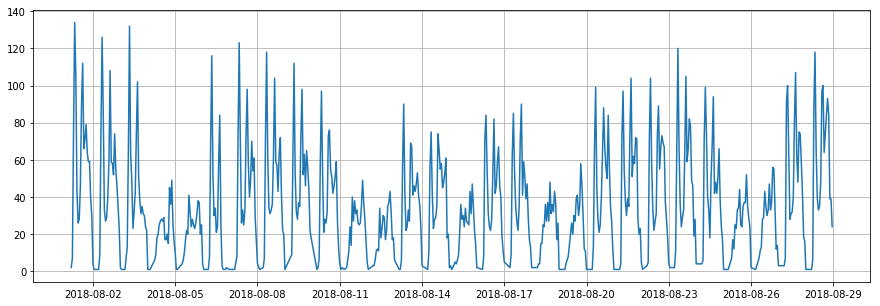

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid()
plt.plot(hourly_count.index, hourly_count.values)

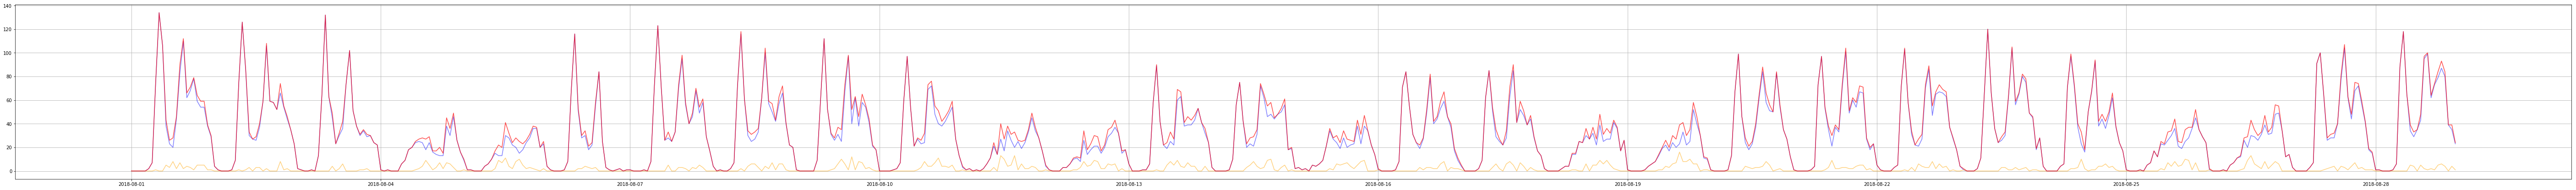

In [37]:
fig, ax = plt.subplots(figsize=(100,7))
ax.grid()
#ax.set_xticks(hourly_count2.index)
plt.plot(hourly_count2.index, hourly_count2[1], alpha=.5, color='blue')
plt.plot(hourly_count2.index, hourly_count2[2], alpha=.5, color='orange')
plt.plot(hourly_count2.index, hourly_count2[1]+hourly_count2[2], color='red', alpha=.7)

In [38]:
hourly_mean.tail()

,is_day_off,travel_time,orig_to_Retiro,dest_to_Retiro,has_multiple_rides,multiple_rides_cluster_size,retiro_speed,retiro_rate
unplug_hourTime,,,,,,,,
2018-08-28 19:00:00+02:00,0.0,1399.2150538,763.4503241,809.0635569,0.5161290,1.6451613,16.7661499,0.4107140
2018-08-28 20:00:00+02:00,0.0,1534.7976190,736.4316081,683.7008720,0.2857143,1.3571429,14.7840225,0.4344864
2018-08-28 21:00:00+02:00,0.0,1328.1282051,700.8132561,775.5858842,0.3076923,1.4102564,16.5821966,0.4032469
2018-08-28 22:00:00+02:00,0.0,1508.5128205,982.4293216,890.5945666,0.4358974,1.5897436,17.7773608,0.3958166
2018-08-28 23:00:00+02:00,0.0,1352.0416667,1314.8926686,538.8839366,0.5833333,1.7500000,16.1681093,0.3720647


In [39]:
import plotly as py
import plotly.graph_objs as go

In [42]:
py.offline.init_notebook_mode(connected=True)

subscribed = go.Scatter(
                x=hourly_count2.index.tz_localize(None),
                y=hourly_count2[1],
                name = "Subscribed user",
                line = dict(color = '#17BECF'),
                opacity = 0.33)

occasional = go.Scatter(
                x=hourly_count2.index.tz_localize(None),
                y=hourly_count2[2],
                name = "Occasional user",
                line = dict(color = 'orange'),
                opacity = 0.33)

total = go.Scatter(
                x=hourly_count2.index.tz_localize(None),
                y=hourly_count2[1]+hourly_count2[2],
                name = "Total",
                line = dict(color = 'red'),
                opacity = 0.66)

data = [subscribed,occasional,total]

layout = dict(
    title = "BiciMAD rides within El Retiro",
    xaxis = dict(
        range = ['2018-08-01 00:00:00','2018-08-08 00:00:00'])
)

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [52]:
len(rides[rides['zip_code'].notnull()])

12981

In [58]:
rich_rides = rides[(rides['ageRange']!=0) & (rides['zip_code'].notnull())]

In [59]:
hourly_rich_rides = rich_rides.groupby(by='unplug_hourTime',sort=True)['_id'].count()

In [62]:
py.offline.init_notebook_mode(connected=True)

total = go.Scatter(
                x=hourly_rich_rides.index.tz_localize(None),
                y=hourly_rich_rides.values,
                name = "Total",
                line = dict(color = 'red'),
                opacity = 0.66)

data = [total]

layout = dict(
    title = "Well known BiciMAD rides within El Retiro",
    xaxis = dict(
        range = ['2018-08-01 00:00:00','2018-08-08 00:00:00'])
)

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [72]:
rich_rides.reset_index(inplace=True, drop=True)

In [76]:
rich_rides

,_id,unplug_hourTime,is_day_off,travel_time,idunplug_station,idplug_station,orig_to_Retiro,dest_to_Retiro,user_type,ageRange,zip_code,has_multiple_rides,multiple_rides_cluster_size,user_day_code,track,full_track,track_path,retiro_speed,retiro_rate,retiro_track
0,5b6779062f384302541d6bc4,2018-08-01 06:00:00+02:00,False,625,128,104,891.2882798,781.2524454,1,5,28045,False,1,7568c842d0fb98e91e6e73187f6ab0882135cb1607fdd4...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.6738714 40.4261851, -3.67690409...",25.6320000,0.4000000,"{'type': 'FeatureCollection', 'features': [{'i..."
1,5b6779062f384302541d6bea,2018-08-01 06:00:00+02:00,False,916,78,155,28.7956614,2570.5987224,1,4,28913,False,1,2c180693a8f6fd40e7270a3f13aca8faad2acfaf6be8d9...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.6787169 40.4442258, -3.6786126 ...",23.0760000,0.0833333,"{'type': 'FeatureCollection', 'features': [{'i..."
2,5b6779062f384302541d6c11,2018-08-01 06:00:00+02:00,False,657,75,56,383.6576370,1038.9932074,1,5,28009,False,1,dff46323a00c9475cf0c5a375b6bf3392169f1391fe788...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.7007164 40.4144226, -3.7003455 ...",26.5080000,0.3000000,"{'type': 'FeatureCollection', 'features': [{'i..."
3,5b6779062f384302541d6c1b,2018-08-01 06:00:00+02:00,False,607,171,86,1236.1302809,326.8594535,1,5,28006,True,2,ec5cc702f6928845296f9f6572eccaf59e1bd94912c0c5...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.691987 40.409297, -3.6898553 40...",26.8110000,0.4000000,"{'type': 'FeatureCollection', 'features': [{'i..."
4,5b6779062f384302541d6c30,2018-08-01 06:00:00+02:00,False,1036,79,159,32.0577925,2221.1736432,1,5,28007,False,1,76e5d43dda336ff9ffa87b0b402cf51b1d5565d1beebed...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.6907784 40.4396792, -3.6900488 ...",20.4408000,0.2941176,"{'type': 'FeatureCollection', 'features': [{'i..."
5,5b67790e2f384302541d7271,2018-08-01 06:00:00+02:00,False,8347,30,82,747.1017909,916.5817190,1,5,28007,True,2,20ac7e87686d682b5162bfe9f416eaaa79b85d913bc14c...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.6744804 40.4009101, -3.66950829...",28.2960000,0.1250000,"{'type': 'FeatureCollection', 'features': [{'i..."
6,5b6779062f384302541d6c3a,2018-08-01 07:00:00+02:00,False,713,83,108,394.2091952,1115.3887596,1,5,28007,False,1,3a86f318a18fed22e4f85bca5c51324839fd4f77947c4d...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.6865654 40.4303057, -3.68680949...",21.9060000,0.3333333,"{'type': 'FeatureCollection', 'features': [{'i..."
7,5b6779062f384302541d6c3c,2018-08-01 07:00:00+02:00,False,758,84,166,288.5764006,1504.2397092,1,4,28021,True,2,f842186739001b7eb41dca38d30648574f8d1ac087602a...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.678492 40.4345973, -3.6794706 4...",24.5610000,0.3333333,"{'type': 'FeatureCollection', 'features': [{'i..."
8,5b6779062f384302541d6c4f,2018-08-01 07:00:00+02:00,False,1080,129,93,1251.8677270,1181.7931732,1,5,28045,False,1,5f02487cb9837147533312788c554b7e2427498569467b...,"{'type': 'FeatureCollection', 'features': [{'g...","{'type': 'FeatureCollection', 'features': [{'g...","LINESTRING (-3.6838303 40.4313576, -3.6875083 ...",19.9944000,0.4166667,"{'type': 'FeatureCollection', 'features': [{'i..."
9,5b6779062f384302541d6c68,2018-08-01 07:00:00+02:00,False,726,79,112,32.0577925,566.1147557,1,5,28007,False,1,3fa27efdcd9c6ef1504f6a93bc0d691e3a17bf7def2197...,"{'type': 'FeatureCollection', 'features': [{'g...","{

In [69]:
with pd.option_context('display.max_rows', None):
    print(rich_rides.zip_code.value_counts())

28007    3565
28009    2239
28012     984
28045     930
28014     586
28005     530
28028     415
28004     397
28006     349
28030     230
28001     219
28015     178
28010     147
28003     112
28013     111
28038      96
28031      87
28002      86
28020      86
28017      74
28039      65
28019      54
28011      51
28016      50
28521      46
28021      45
28027      43
28018      42
28925      39
28941      35
28041      34
45007      34
28053      30
28008      30
28023      28
28047      27
28055      27
28044      26
28033      26
28022      24
28034      24
28500      23
28806      22
28024      20
28300      20
28043      20
28042      19
28032      19
28250      19
28025      18
20007      18
28000      17
28523      17
13004      15
28830      15
28911      14
28943      14
45161      14
28522      14
28912      14
28051      14
28036      14
45005      13
28026      13
28037      12
13679      12
28933      11
13003      10
28400      10
28723      10
28939      10
28029 

In [95]:
clusterable = pd.DataFrame()

In [97]:
#Treating the hour of day as a discrete numerical feature
clusterable['hour'] = pd.Series(map(lambda h : h.strftime('%H'), rich_rides['unplug_hourTime']))

In [149]:
#Binarizing the "day_off" feature
clusterable['day_off'] = np.array(rich_rides['is_day_off'].values, dtype=int)

In [151]:
clusterable['travel_time'] = rich_rides['travel_time']

In [154]:
clusterable['orig_to_retiro'] = rich_rides['orig_to_Retiro']

In [155]:
clusterable['dest_to_retiro'] = rich_rides['orig_to_Retiro']

In [ ]:
clusterable